https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, mpld3
skill_cell = pd.read_csv('/Users/jz/GitHub/CapStone/df_paired_skills.csv',index_col=0)[:100]
skill_rank = pd.read_csv('/Users/jz/GitHub/CapStone/feature_importance.csv',index_col=0)

In [10]:
skill_rank.head()

,skills,importance
0,R,0.053017
1,Java,0.049587
2,Python,0.042361
3,SPSS,0.042139
4,Excel,0.037315


In [11]:
skill_rank.columns=['skill','count']

In [12]:
skill_uni_list = skill_rank['skill'].to_list()

In [13]:
list_of_skill = skill_cell['Paired Skills'].to_list()

In [14]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
cleaned_sections = list_of_skill
characters = skill_uni_list[:40]

In [16]:
sections_dictionary = {}
iterative = 0
for section in cleaned_sections:
    iterative += 1
    for char in characters:
        if char in section:
            if str(iterative) in sections_dictionary.keys():
                sections_dictionary[str(iterative)].append(char)  
            else:
                sections_dictionary[str(iterative)] = [char]   

In [17]:
##set base df (co-occurance matrix)
df = pd.DataFrame(columns = characters, index = characters)
df[:] = int(0)

#iterate through each POV of book and add one for each character-character relationship
#-> in this case, relationship equates to appearing in the same POV
for value in sections_dictionary.values():
    for character1 in characters:
        for character2 in characters:
            if character1 in value and character2 in value:
                df[character1][character2] += 1
                df[character2][character1] += 1

In [18]:
#add weights to edges
edge_list = [] #test networkx
for index, row in df.iterrows():
    i = 0
    for col in row:
        weight = float(col)/464
        edge_list.append((index, df.columns[i], weight))
        i += 1

#Remove edge if 0.0
updated_edge_list = [x for x in edge_list if not x[2] == 0.0]

#create duple of char, occurance in novel
node_list = []
for i in characters:
    for e in updated_edge_list:
        if i == e[0] and i == e[1]:
           node_list.append((i, e[2]*6))
for i in node_list:
    if i[1] == 0.0:
        node_list.remove(i)

#remove self references
for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)

### Use Gephi deal with updated_edge_list.csv

In [21]:
pd.DataFrame(updated_edge_list,columns=['Source','Target','rel']).to_csv('paired_edge_list.csv')
# pd.DataFrame(updated_edge_list,columns=['Source','Target','rel']).to_csv('updated_edge_list.csv')

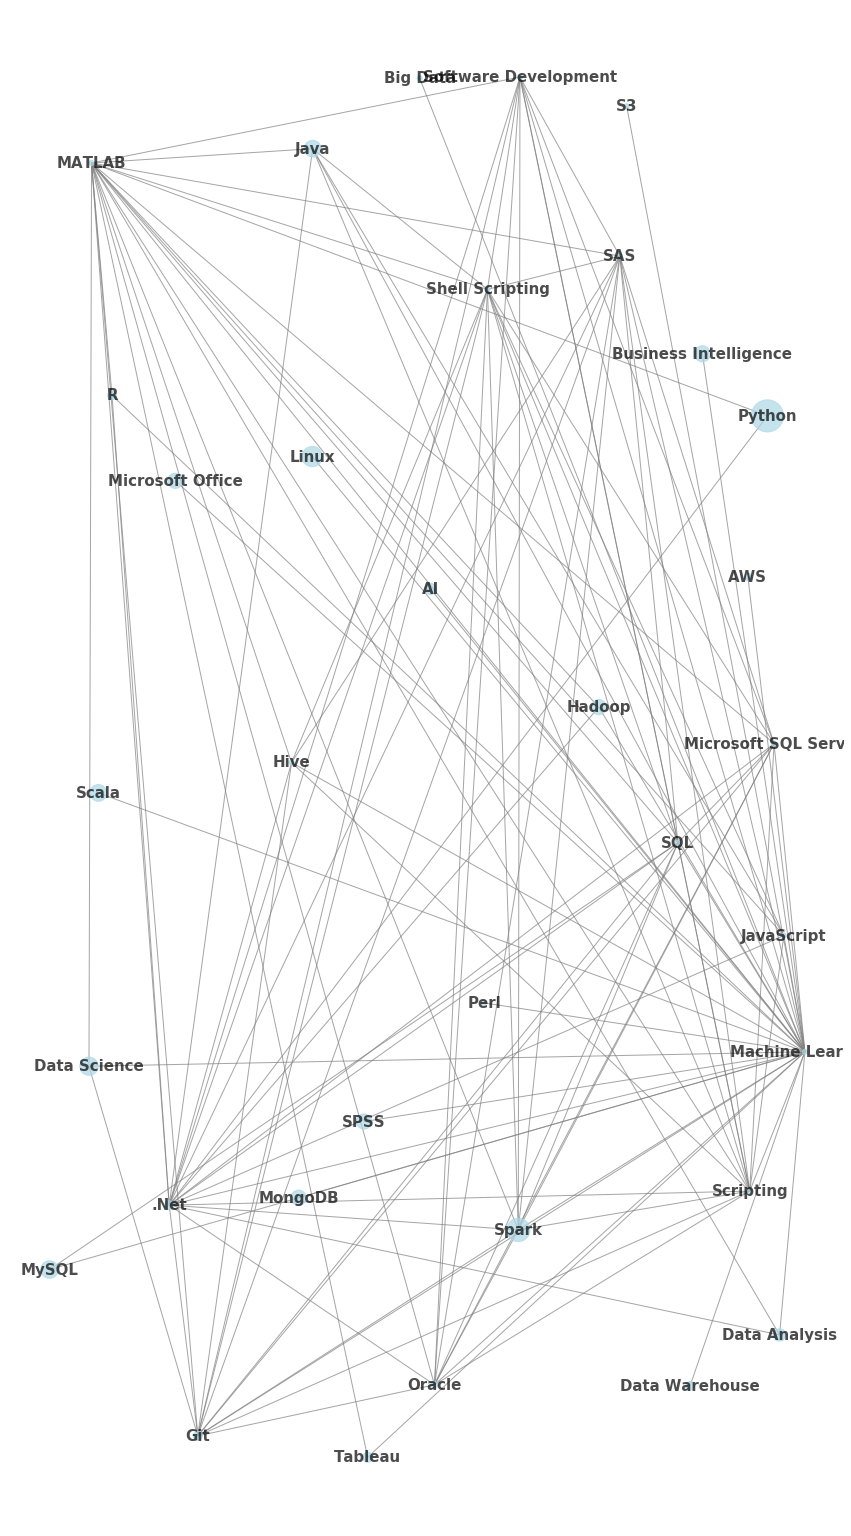

In [20]:
#set canvas size
plt.subplots(figsize=(15,28))

#networkx graph time!
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

#check data of graphs
#G.nodes(data=True)
#G.edges(data = True)

#manually copy and pasted the node order using 'nx.nodes(G)'
#Couldn't determine another route to listing out the order of nodes for future work
node_order = skill_uni_list

#reorder node list
updated_node_order = []
for i in node_order:
    for x in node_list:
        if x[0] == i:
            updated_node_order.append(x)

node_scalar = 1000
edge_scalar = 200
sizes = [x[1]*node_scalar for x in updated_node_order]
# widths = [x*edge_scalar for x in updated_again_edges]

#draw the graph
pos = nx.spring_layout(G, k=0.2, iterations=2)

nx.draw(G, pos, with_labels=True, font_size = 15, font_weight = 'bold', edge_color='grey',
                 node_color='#ADD8E6',alpha=0.7
        ,node_size = sizes)